In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

        Column  Unique_Count
0    InvoiceNo         25900
1    StockCode          4070
2  Description          4223
3     Quantity           722
4  InvoiceDate         23260
5    UnitPrice          1630
6   CustomerID          4372
7      Country            38

Quantity: Min = -80995, Max = 80995
UnitPrice: Min = -11062.06, Max = 38970.0


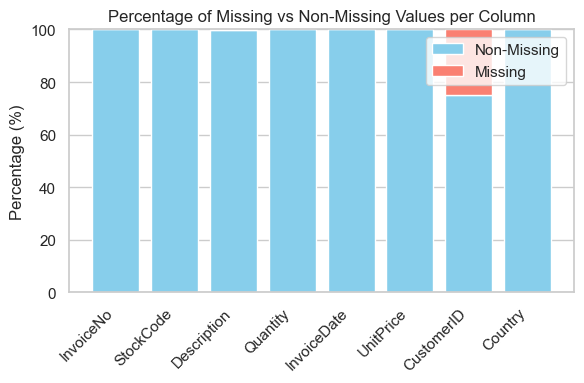

In [17]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
#checking number of unique values
unique_summary = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
})

print(unique_summary)
print()
for col in ['Quantity', 'UnitPrice']:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")
#  Compute missing and non-missing percentages
missing_percent = df.isnull().mean() * 100
non_missing_percent = 100 - missing_percent

# Prepare DataFrame for plotting
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing': missing_percent,
    'Non-Missing': non_missing_percent
})

# Plot stacked bar chart
plt.figure(figsize=(6,4))
plt.bar(missing_df['Column'], missing_df['Non-Missing'], color='skyblue', label='Non-Missing')
plt.bar(missing_df['Column'], missing_df['Missing'], bottom=missing_df['Non-Missing'], color='salmon', label='Missing')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Missing vs Non-Missing Values per Column')
plt.legend()
plt.tight_layout()
plt.savefig("missingdata.png")
plt.show()

In [9]:
# Keep original row count
original_rows = len(df)

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID']).reset_index(drop=True)

# Number of rows dropped
rows_dropped = original_rows - len(df)
percent = (rows_dropped/ original_rows)*100
print(f"total number of rows : {original_rows}")
print(f"Number of rows dropped due to missing CustomerID: {rows_dropped}")
print(f"percentage of rows dropped : {percent}")


total number of rows : 541909
Number of rows dropped due to missing CustomerID: 135080
percentage of rows dropped : 24.926694334288598


In [10]:
# Keep row count before conversion
rows_before = len(df)

# Convert columns to correct datatypes
df['InvoiceNo'] = df['InvoiceNo'].astype(str)           # alphanumeric
df['StockCode'] = df['StockCode'].astype(str)           # alphanumeric
df['Description'] = df['Description'].astype(str)       # text
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')  # numeric
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # datetime
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')        # numeric
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')      # numeric
df['Country'] = df['Country'].astype(str)             # text

# Drop any rows that became NaN during conversion
df = df.dropna().reset_index(drop=True)
rows_after = len(df)

# Calculate number and percentage of rows dropped
rows_dropped = rows_before - rows_after
percent_dropped = (rows_dropped / rows_before) * 100

print(f"Number of rows dropped during datatype conversion: {rows_dropped}")
print(f"Percentage of rows dropped: {percent_dropped:.2f}%")


Number of rows dropped during datatype conversion: 0
Percentage of rows dropped: 0.00%


In [14]:
# Keep initial row count
rows_initial = len(df)

# Negative or zero Quantity
rows_before = len(df)
df = df[df['Quantity'] > 0]
print(f"Rows dropped (Quantity <= 0): {rows_before - len(df)} "
      f"({(rows_before - len(df)) / rows_initial * 100:.2f}%)")

# Negative or zero UnitPrice
rows_before = len(df)
df = df[df['UnitPrice'] > 0]
print(f"Rows dropped (UnitPrice <= 0): {rows_before - len(df)} "
      f"({(rows_before - len(df)) / rows_initial * 100:.2f}%)")

# Invoice numbers starting with 'C'
rows_before = len(df)
df = df[~df['InvoiceNo'].str.startswith('C')]
print(f"Rows dropped (Canceled invoices): {rows_before - len(df)} "
      f"({(rows_before - len(df)) / rows_initial * 100:.2f}%)")
# Drop duplicates
rows_before = len(df)
df = df.drop_duplicates()
print(f"Rows dropped (duplicates): {rows_before - len(df)} "
      f"({(rows_before - len(df)) / rows_initial * 100:.2f}%)")

###  Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

###  Create Month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

###  Standardize textual columns
df['Description'] = df['Description'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip().str.lower()
df.to_csv('data_preprocessed.csv', index=False)
print(f"\nFinal dataset shape: {df.shape}")


Rows dropped (Quantity <= 0): 0 (0.00%)
Rows dropped (UnitPrice <= 0): 0 (0.00%)
Rows dropped (Canceled invoices): 0 (0.00%)
Rows dropped (duplicates): 0 (0.00%)

Final dataset shape: (392692, 12)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16312\927275396.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis", ax=axes[1])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16312\927275396.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="magma", ax=axes[2])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16312\927275396.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_revenue.index, y=weekday_revenue.val

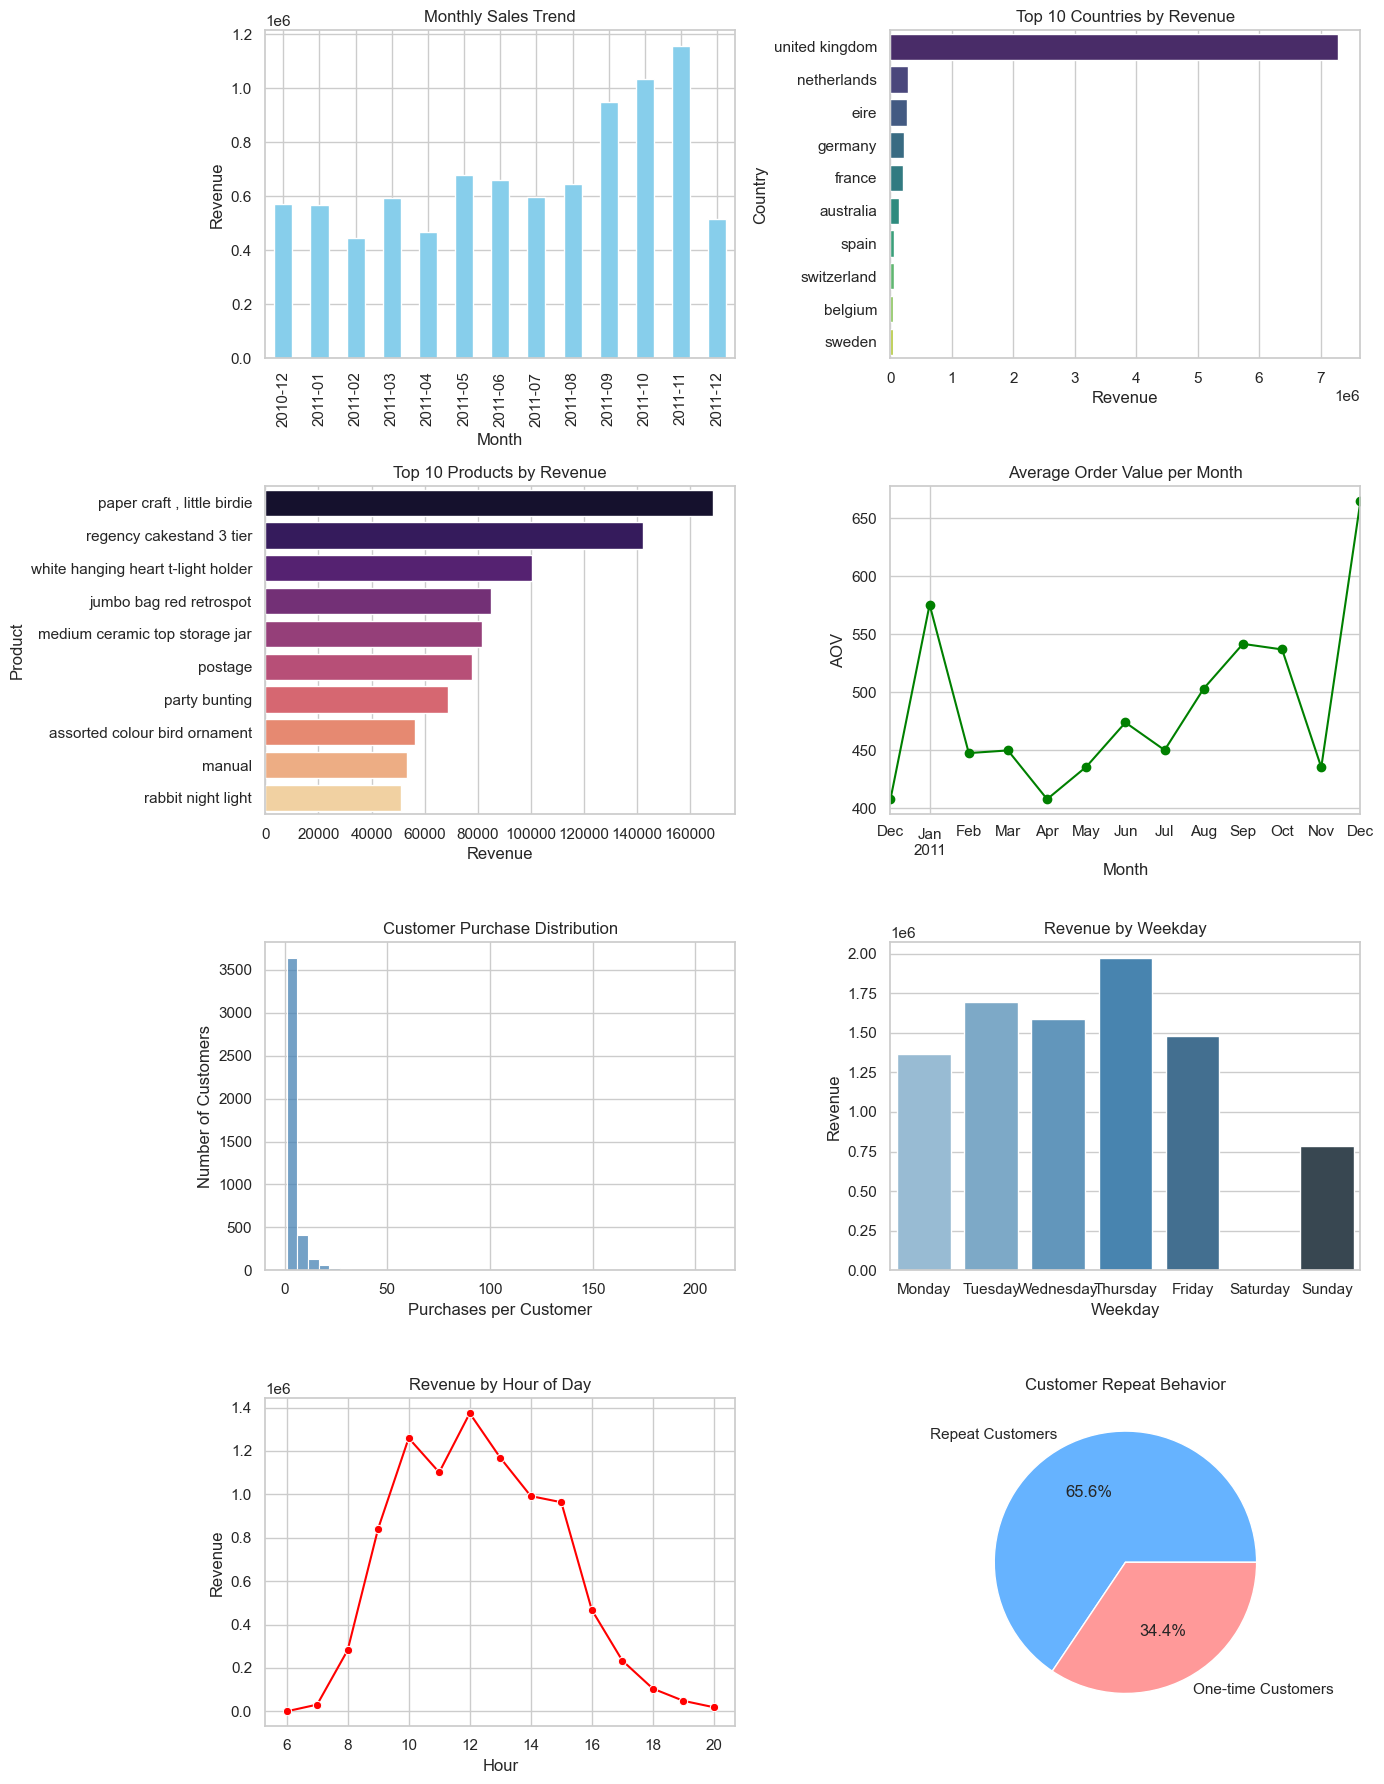

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

monthly_sales = df.groupby('Month')['Revenue'].sum()
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
monthly_orders = df.groupby('Month')['InvoiceNo'].nunique()
aov = monthly_sales / monthly_orders
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
weekday_revenue = df.groupby('Weekday')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
hourly_revenue = df.groupby('Hour')['Revenue'].sum()
purchase_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = (purchase_counts > 1).sum()
one_time_customers = (purchase_counts == 1).sum()

# -------------------------------
# 2x4 grid for the remaining 8 plots
# -------------------------------
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
axes = axes.flatten()

# 1. Monthly Sales Trend
monthly_sales.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Monthly Sales Trend')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue')

# 2. Top 10 Countries by Revenue
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Countries by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Country')

# 3. Top 10 Products by Revenue
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="magma", ax=axes[2])
axes[2].set_title('Top 10 Products by Revenue')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('Product')

# 4. Average Order Value per Month
aov.plot(kind='line', marker='o', color='green', ax=axes[3])
axes[3].set_title('Average Order Value per Month')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('AOV')

# 5. Customer Purchase Distribution
sns.histplot(customer_freq, bins=40, kde=False, color="steelblue", ax=axes[4])
axes[4].set_title('Customer Purchase Distribution')
axes[4].set_xlabel('Purchases per Customer')
axes[4].set_ylabel('Number of Customers')

# 6. Revenue by Weekday
sns.barplot(x=weekday_revenue.index, y=weekday_revenue.values, palette="Blues_d", ax=axes[5])
axes[5].set_title('Revenue by Weekday')
axes[5].set_xlabel('Weekday')
axes[5].set_ylabel('Revenue')

# 7. Revenue by Hour
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker="o", color="red", ax=axes[6])
axes[6].set_title('Revenue by Hour of Day')
axes[6].set_xlabel('Hour')
axes[6].set_ylabel('Revenue')

# 8. Customer Repeat Behavior
axes[7].pie([repeat_customers, one_time_customers],
            labels=['Repeat Customers', 'One-time Customers'],
            autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
axes[7].set_title('Customer Repeat Behavior')

plt.tight_layout()
plt.savefig("data_analysis.png")
plt.show()


In [18]:
today = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate per customer
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': [np.min, np.max],
    'InvoiceNo': pd.Series.nunique,  # counts unique invoices
    'Revenue': 'sum'
})

# Flatten MultiIndex columns
rfm_df.columns = ['FirstPurchase', 'LastPurchase', 'Frequency', 'Monetary']

# Recency (days since last purchase)
rfm_df['Recency'] = (today - rfm_df['LastPurchase']).dt.days

# Average Order Value (Monetary / Frequency)
rfm_df['AOV'] = rfm_df['Monetary'] / rfm_df['Frequency']

# Customer Tenure (days between first and last purchase)
rfm_df['Tenure'] = (rfm_df['LastPurchase'] - rfm_df['FirstPurchase']).dt.days

# Optional: drop date columns if not needed
rfm_df = rfm_df.reset_index()
rfm_df = rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AOV', 'Tenure']]

# Display sample
rfm_df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4244\2206912921.py:4: FutureWarning: The provided callable <function min at 0x0000012FD54BBE20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  rfm_df = df.groupby('CustomerID').agg({
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4244\2206912921.py:4: FutureWarning: The provided callable <function max at 0x0000012FD54BBD00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rfm_df = df.groupby('CustomerID').agg({


,CustomerID,Recency,Frequency,Monetary,AOV,Tenure
0,12346.0,326,1,77183.60,77183.600000,0
1,12347.0,2,7,4310.00,615.714286,365
2,12348.0,75,4,1797.24,449.310000,282
3,12349.0,19,1,1757.55,1757.550000,0
4,12350.0,310,1,334.40,334.400000,0


In [10]:
rfm_df.to_csv('rfm_features.csv', index=False)
print("Customer-level RFM dataframe saved as rfm_features.csv")


Customer-level RFM dataframe saved as rfm_features.csv
